---

# Patuli (C23-PS037) - Bangkit 2023 Capstone Project

---

## [**Words**] Model Training

---

**Author:** Ammar Sufyan, Fauzan Farhan Antoro, Belvin Shandy Aurora

**Github:** https://github.com/Patuli-Pahlawan-Tuli/Patuli-ML

# 1.&nbsp;Collecting and Labeling Training Images

The training dataset used for this project consists of a large collection of annotated sign language images. The dataset includes diverse samples of different sign language gestures, captured under various lighting conditions, backgrounds, and hand orientations. The annotations provide bounding box coordinates and corresponding labels for each sign language gesture.

Link to the dataset:

- [**Abjad**](https://universe.roboflow.com/patuli-fbumd/patuli-alphabetical-dataset)
- [**Angka**](https://universe.roboflow.com/patuli-fbumd/patuli-numbers-dataset)
- [**Kata**](https://universe.roboflow.com/patuli-fbumd/patuli-words-dataset)

# 2.&nbsp;Install TensorFlow Object Detection Dependencies

In [1]:
!pip install tensorflow==2.8.0
# !sudo apt install protobuf-compiler

  Using cached tensorflow-2.8.0-cp38-cp38-manylinux2010_x86_64.whl (497.6 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.8.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.7 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached libclang-16.0.0-py2.py3-none-manylinux2010_x86_64.whl (22.9 MB)
  Using cached numpy-1.24.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-4.23.2-cp37-abi3-manylinux2014_x86_64.whl (304 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached wrapt-1.15.0-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinu

In [2]:
!pip install protobuf==3.20.*

  Using cached protobuf-3.20.3-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.0 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.23.2
    Uninstalling protobuf-4.23.2:
      Successfully uninstalled protobuf-4.23.2


In [1]:
import tensorflow as tf

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


2023-06-12 14:07:21.892660: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-12 14:07:22.052468: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-12 14:07:22.099766: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-12 14:07:22.099962: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built witho

In [3]:
# Clone the tensorflow models repository from GitHub
!git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3909, done.
remote: Counting objects: 100% (3909/3909), done.
remote: Compressing objects: 100% (3015/3015), done.
remote: Total 3909 (delta 1129), reused 2002 (delta 841), pack-reused 0
Receiving objects: 100% (3909/3909), 49.65 MiB | 4.88 MiB/s, done.
Resolving deltas: 100% (1129/1129), done.


In [4]:
%cd models/research/
!protoc object_detection/protos/*.proto --python_out=.
%cd ../..

/home/dadang/Documents/ML/Bangkit/train_huruf/local_huruf/models/research
/home/dadang/Documents/ML/Bangkit/train_huruf/local_huruf


In [5]:
# Modify setup.py file to install the tf-models-official repository targeted at TF v2.8.0
import re
with open('models/research/object_detection/packages/tf2/setup.py') as f:
    s = f.read()

with open('models/research/setup.py', 'w') as f:
    # Set fine_tune_checkpoint path
    s = re.sub('tf-models-official>=2.5.1',
               'tf-models-official==2.8.0', s)
    f.write(s)

In [6]:
# Install the Object Detection API
!pip install models/research/

Processing ./models/research
  Preparing metadata (setup.py) ... done
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1697016 sha256=1e44862f25437ff200926f2b7edeb0b25843d0c78e8525ac367671e7dbc8f49c
  Stored in directory: /tmp/pip-ephem-wheel-cache-sucuebs0/wheels/67/d5/31/9e1dedd78d3be5dc9240cd105be6bafb7259c4fcdf79730cf4
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


In [7]:
# Run Model Builder Test file, just to verify everything's working properly
!python3 models/research/object_detection/builders/model_builder_tf2_test.py

/home/dadang/Documents/ML/Bangkit/train_huruf/local_huruf/.venv/lib/python3.8/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/home/dadang/Documents/ML/Bangkit/train_huruf/local_huruf/.venv/lib/python3.8/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/home/dadang/Documents/ML/Bangkit/train_huruf/local_huruf/.venv/lib/python3.8/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutexC1Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/home/dadang/Documents/ML/Bangkit/train_huruf/local_huruf/.venv/lib/python3.8/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/home/dadang/Documents/ML/Bangkit/train_huruf/local_huruf/.venv/lib/python3.8/site-packages/ten

# 3.&nbsp;Preprocessing Data

We performed data preprocessing using the [Roboflow](https://roboflow.com/) platform.

## 3.1&nbsp;Splitting Data

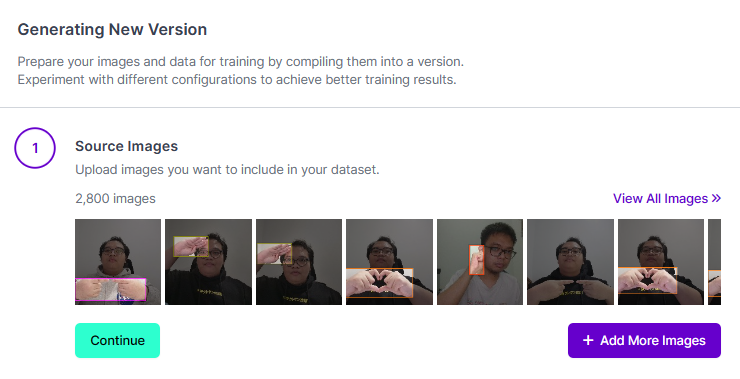

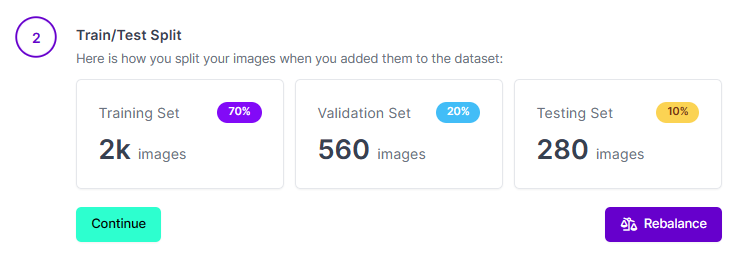

## 3.2&nbsp;Resizing and Augmenting Data

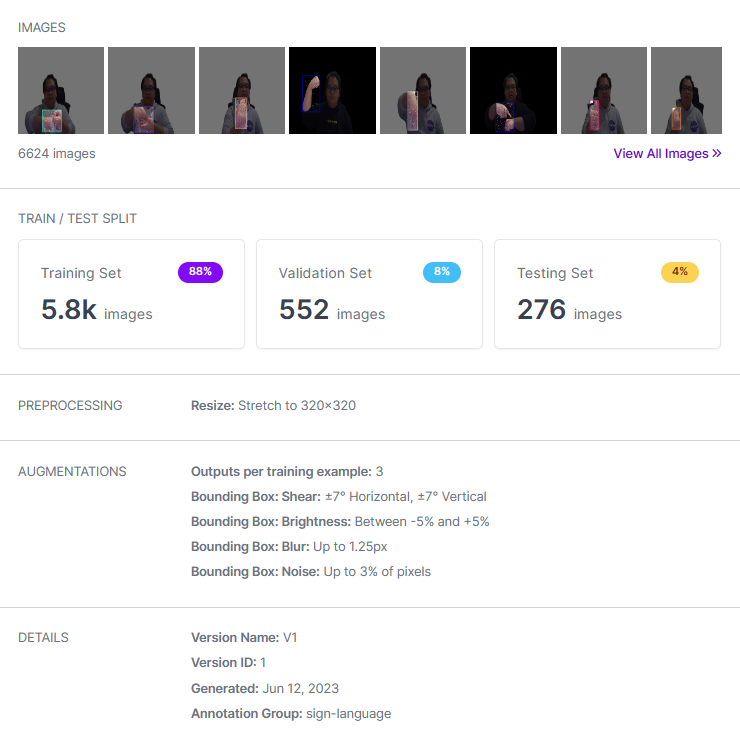

## 3.3&nbsp;Download the Data and Convert to TFRecord

In [3]:
# Install Roboflow library to download the dataset
!pip install roboflow

  Using cached roboflow-1.0.9-py3-none-any.whl (56 kB)
  Using cached certifi-2022.12.7-py3-none-any.whl (155 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached python_dotenv-1.0.0-py3-none-any.whl (19 kB)
  Using cached wget-3.2-py3-none-any.whl
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl (54 kB)
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
      Successfully uninstalled idna-3.4
  Attempting uninstall: cycler
    Found existing installation: cycler 0.11.0
    Uninstalling cycler-0.11.0:
      Successfully uninstalled cycler-0.11.0
  Attempting uninstall: certifi
    Found existing installation: certifi 2023.5.7
    Uninstalling certifi-2023.5.7:
      Successfully uninstalled certifi-2023.5.7


In [4]:
# install the dotenv to get the key
!pip install python-dotenv

In [8]:
import os
from dotenv import load_dotenv

load_dotenv()
api_key=os.getenv("api_key_patuli") 

In [9]:
# Download the dataset
from roboflow import Roboflow
rf = Roboflow(api_key=api_key, model_format="voc")
dataset = rf.workspace().project("patuli-words-dataset").version(1).download(location="images")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to images in voc:: 100%|██████████| 13253/13253 [00:00<00:00, 26499.69it/s]


In [10]:
# Download data conversion scripts
!wget https://raw.githubusercontent.com/Patuli-Pahlawan-Tuli/Patuli-ML/main/utils/create_csv_modified.py
!wget https://raw.githubusercontent.com/Patuli-Pahlawan-Tuli/Patuli-ML/main/utils/create_tfrecord.py

--2023-06-12 14:10:21--  https://raw.githubusercontent.com/Patuli-Pahlawan-Tuli/Patuli-ML/main/utils/create_csv_modified.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1416 (1.4K) [text/plain]
Saving to: ‘create_csv_modified.py’

create_csv_modified 100%[===================>]   1.38K  --.-KB/s    in 0s      

2023-06-12 14:10:22 (4.92 MB/s) - ‘create_csv_modified.py’ saved [1416/1416]

--2023-06-12 14:10:22--  https://raw.githubusercontent.com/Patuli-Pahlawan-Tuli/Patuli-ML/main/utils/create_tfrecord.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting re

In [11]:
# Create CSV data files and TFRecord files
!python3 create_csv_modified.py
!python3 create_tfrecord.py --csv_input=images/train_labels.csv --labelmap=classes.txt --image_dir=images/train --output_path=train.tfrecord
!python3 create_tfrecord.py --csv_input=images/valid_labels.csv --labelmap=classes.txt --image_dir=images/valid --output_path=val.tfrecord

Successfully converted xml to csv.
Successfully converted xml to csv.
2023-06-12 14:10:27.617520: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-12 14:10:27.623690: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-12 14:10:27.623986: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
Successfully created the TFRecords: /home/dadang/Documents/ML/Bangkit/train_huruf/local_huruf/train.tfrecord
2023-06-12 14:10:31.802297: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/device

In [12]:
train_record_fname = 'train.tfrecord'
val_record_fname = 'val.tfrecord'
label_map_pbtxt_fname = 'labelmap.pbtxt'

# 4.&nbsp;Setup Training

In [13]:
#Models available in the TF2 object detection zoo
chosen_model = 'ssd-mobilenet-v2-fpnlite-320'

MODELS_CONFIG = {
      'ssd-mobilenet-v2-fpnlite-320': {
        'model_name': 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8',
        'base_pipeline_file': 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config',
        'pretrained_checkpoint': 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz',
    }
}

model_name = MODELS_CONFIG[chosen_model]['model_name']
pretrained_checkpoint = MODELS_CONFIG[chosen_model]['pretrained_checkpoint']
base_pipeline_file = MODELS_CONFIG[chosen_model]['base_pipeline_file']

In [14]:
# Create "config" folder for holding pre-trained weights and configuration files
%mkdir models/config/
%cd models/config/

# Download pre-trained model weights
import tarfile
download_tar = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/' + pretrained_checkpoint
!wget {download_tar}
tar = tarfile.open(pretrained_checkpoint)
tar.extractall()
tar.close()

# Download training configuration file for model
download_config = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/' + base_pipeline_file
!wget {download_config}

%cd ../..

/home/dadang/Documents/ML/Bangkit/train_huruf/local_huruf/models/config
--2023-06-12 14:10:33--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.194.128, 2404:6800:4003:c00::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.194.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  4.80MB/s    in 4.1s    

2023-06-12 14:10:38 (4.81 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

--2023-06-12 14:10:38--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config
Resolving raw.githubusercontent.com (raw.githubuserc

In [15]:
# Set training parameters for the model
num_steps = 20000
batch_size = 16

In [16]:
# Set file locations and get number of classes for config file
pipeline_fname = 'models/config/' + base_pipeline_file
fine_tune_checkpoint = 'models/config/' + model_name + '/checkpoint/ckpt-0'

def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())
num_classes = get_num_classes(label_map_pbtxt_fname)
print('Total classes:', num_classes)

Total classes: 23


In [18]:
# Create custom configuration file by writing the dataset, model checkpoint, and training parameters into the base pipeline file
import re

print('writing custom configuration file')

with open(pipeline_fname) as f:
    s = f.read()

with open('models/config/pipeline_file.config', 'w') as f:
    
    # Set fine_tune_checkpoint path
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)
    
    # Set tfrecord files for train and test datasets
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/train)(.*?")', 'input_path: "{}"'.format(train_record_fname), s)
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/val)(.*?")', 'input_path: "{}"'.format(val_record_fname), s)

    # Set label_map_path
    s = re.sub(
        'label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    # Set batch_size
    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(batch_size), s)

    # Set training steps, num_steps
    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(num_steps), s)
    
    # Set number of classes num_classes
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(num_classes), s)

    # Change fine-tune checkpoint type from "classification" to "detection"
    s = re.sub(
        'fine_tune_checkpoint_type: "classification"', 'fine_tune_checkpoint_type: "{}"'.format('detection'), s)
    
    # Reduce learning rate (because it's too high in the default config file)
    s = re.sub('learning_rate_base: .8',
               'learning_rate_base: .08', s)
      
    s = re.sub('warmup_learning_rate: 0.13333',
               'warmup_learning_rate: .026666', s)

    f.write(s)

writing custom configuration file


In [19]:
# Set the path to the custom config file and the directory to store training checkpoints in
pipeline_file = 'models/config/pipeline_file.config'
model_dir = 'training'

# 5.&nbsp;Start Training

In [20]:
# Run training!
!python3 models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={pipeline_file} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --sample_1_of_n_eval_examples=1

/home/dadang/Documents/ML/Bangkit/train_huruf/local_huruf/.venv/lib/python3.8/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/home/dadang/Documents/ML/Bangkit/train_huruf/local_huruf/.venv/lib/python3.8/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/home/dadang/Documents/ML/Bangkit/train_huruf/local_huruf/.venv/lib/python3.8/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutexC1Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/home/dadang/Documents/ML/Bangkit/train_huruf/local_huruf/.venv/lib/python3.8/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/home/dadang/Documents/ML/Bangkit/train_huruf/local_huruf/.venv/lib/python3.8/site-packages/ten

# 6.&nbsp;Convert Model to TensorFlow Lite

In [24]:
# Make a directory to store the trained TFLite model
!mkdir custom_model_lite
output_directory = 'custom_model_lite'

# Path to training directory (the conversion script automatically chooses the highest checkpoint file)
last_model_path = 'training'

!python3 models/research/object_detection/export_tflite_graph_tf2.py \
    --trained_checkpoint_dir {last_model_path} \
    --output_directory {output_directory} \
    --pipeline_config_path {pipeline_file}


/home/dadang/Documents/ML/Bangkit/train_huruf/local_huruf/.venv/lib/python3.8/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/home/dadang/Documents/ML/Bangkit/train_huruf/local_huruf/.venv/lib/python3.8/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/home/dadang/Documents/ML/Bangkit/train_huruf/local_huruf/.venv/lib/python3.8/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutexC1Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/home/dadang/Documents/ML/Bangkit/train_huruf/local_huruf/.venv/lib/python3.8/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/home/dadang/Documents/ML/Bangkit/train_huruf/local_huruf/.venv/lib/python3.8/site-packages/ten

In [25]:
# Convert exported graph file into TFLite model file
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model('custom_model_lite/saved_model')
tflite_model = converter.convert()

with open('custom_model_lite/detect.tflite', 'wb') as f:
  f.write(tflite_model)

Estimated count of arithmetic ops: 1.788 G  ops, equivalently 0.894 G  MACs


2023-06-12 15:22:41.200929: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2023-06-12 15:22:41.200986: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2023-06-12 15:22:41.201231: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: custom_model_lite/saved_model
2023-06-12 15:22:41.240958: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2023-06-12 15:22:41.241002: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if present) from: custom_model_lite/saved_model
2023-06-12 15:22:41.430662: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2023-06-12 15:22:41.969947: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: custom_model_lite/saved_model
2023-06-12 15:22:42.242136: I tensorflow/cc/saved_model/loader.cc:301] SavedModel load for tags { ser

## 6.1&nbsp;Write Metadata to TensorFlow Lite

In [19]:
!pip install tflite-support-nightly

  Using cached tflite_support_nightly-0.4.4.dev20230522-cp38-cp38-manylinux2014_x86_64.whl (60.8 MB)
  Using cached sounddevice-0.4.6-py3-none-any.whl (31 kB)
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Using cached cffi-1.15.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (442 kB)
  Using cached pycparser-2.21-py2.py3-none-any.whl (118 kB)


In [26]:
from tflite_support.metadata_writers import object_detector
from tflite_support.metadata_writers import metadata_info
from tflite_support.metadata_writers import writer_utils
from tflite_support import metadata_schema_py_generated as _metadata_fb

In [27]:
ObjectDetectorWriter = object_detector.MetadataWriter
_MODEL_PATH = "custom_model_lite/detect.tflite"
# Task Library expects label files that are in the same format as the one below.
_LABEL_FILE = "classes.txt"
_SAVE_TO_PATH = "model_metadata.tflite"
# Normalization parameters is required when reprocessing the image. It is
# optional if the image pixel values are in range of [0, 255] and the input
# tensor is quantized to uint8. See the introduction for normalization and
# quantization parameters below for more details.
# https://www.tensorflow.org/lite/models/convert/metadata#normalization_and_quantization_parameters)
_INPUT_NORM_MEAN = 127.5
_INPUT_NORM_STD = 127.5

# Create the metadata writer.
writer = ObjectDetectorWriter.create_for_inference(
    writer_utils.load_file(_MODEL_PATH), [_INPUT_NORM_MEAN], [_INPUT_NORM_STD],
    [_LABEL_FILE])

# Verify the metadata generated by metadata writer.
print(writer.get_metadata_json())

# Populate the metadata into the model.
writer_utils.save_file(writer.populate(), _SAVE_TO_PATH)

{
  "name": "ObjectDetector",
  "description": "Identify which of a known set of objects might be present and provide information about their positions within the given image or a video stream.",
  "subgraph_metadata": [
    {
      "input_tensor_metadata": [
        {
          "name": "image",
          "description": "Input image to be detected.",
          "content": {
            "content_properties_type": "ImageProperties",
            "content_properties": {
              "color_space": "RGB"
            }
          },
          "process_units": [
            {
              "options_type": "NormalizationOptions",
              "options": {
                "mean": [
                  127.5
                ],
                "std": [
                  127.5
                ]
              }
            }
          ],
          "stats": {
            "max": [
              1.0
            ],
            "min": [
              -1.0
            ]
          }
        }
      ],
     

In [28]:
from tflite_support import metadata

displayer = metadata.MetadataDisplayer.with_model_file("model_metadata.tflite")
print("Metadata populated:")
print(displayer.get_metadata_json())

print("Associated file(s) populated:")
for file_name in displayer.get_packed_associated_file_list():
  print("file name: ", file_name)
  print("file content:")
  print(displayer.get_associated_file_buffer(file_name))

Metadata populated:
{
  "name": "ObjectDetector",
  "description": "Identify which of a known set of objects might be present and provide information about their positions within the given image or a video stream.",
  "subgraph_metadata": [
    {
      "input_tensor_metadata": [
        {
          "name": "image",
          "description": "Input image to be detected.",
          "content": {
            "content_properties_type": "ImageProperties",
            "content_properties": {
              "color_space": "RGB"
            }
          },
          "process_units": [
            {
              "options_type": "NormalizationOptions",
              "options": {
                "mean": [
                  127.5
                ],
                "std": [
                  127.5
                ]
              }
            }
          ],
          "stats": {
            "max": [
              1.0
            ],
            "min": [
              -1.0
            ]
          }
    

# 7.&nbsp;Testing the Model

## 7.1&nbsp;Inference Test Images

In [29]:
# Script to run custom TFLite model on test images to detect objects
# Source: https://github.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/blob/master/TFLite_detection_image.py

# Import packages
import os
import cv2
import numpy as np
import sys
import glob
import random
import importlib.util
from tensorflow.lite.python.interpreter import Interpreter
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### Define function for inferencing with TFLite model and displaying results

def tflite_detect_images(modelpath, imgpath, lblpath, min_conf, num_test_images, savepath='results', txt_only=False):

  # Grab filenames of all images in test folder
  images = glob.glob(imgpath + '/*.jpg') + glob.glob(imgpath + '/*.JPG') + glob.glob(imgpath + '/*.png') + glob.glob(imgpath + '/*.bmp') + glob.glob(imgpath + '/*.jpeg') 

  # Load the label map into memory
  with open(lblpath, 'r') as f:
      labels = [line.strip() for line in f.readlines()]

  # Load the Tensorflow Lite model into memory
  interpreter = Interpreter(model_path=modelpath)
  interpreter.allocate_tensors()

  # Get model details
  input_details = interpreter.get_input_details()
  output_details = interpreter.get_output_details()
  height = input_details[0]['shape'][1]
  width = input_details[0]['shape'][2]

  float_input = (input_details[0]['dtype'] == np.float32)

  input_mean = 127.5
  input_std = 127.5

  # Randomly select test images
  images_to_test = random.sample(images, num_test_images)

  # Loop over every image and perform detection
  for image_path in images_to_test:

      # Load image and resize to expected shape [1xHxWx3]
      image = cv2.imread(image_path)
      image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      imH, imW, _ = image.shape 
      image_resized = cv2.resize(image_rgb, (width, height))
      input_data = np.expand_dims(image_resized, axis=0)

      # Normalize pixel values if using a floating model (i.e. if model is non-quantized)
      if float_input:
          input_data = (np.float32(input_data) - input_mean) / input_std

      # Perform the actual detection by running the model with the image as input
      interpreter.set_tensor(input_details[0]['index'],input_data)
      interpreter.invoke()

      # Retrieve detection results
      boxes = interpreter.get_tensor(output_details[1]['index'])[0] # Bounding box coordinates of detected objects
      classes = interpreter.get_tensor(output_details[3]['index'])[0] # Class index of detected objects
      scores = interpreter.get_tensor(output_details[0]['index'])[0] # Confidence of detected objects

      detections = []

      # Loop over all detections and draw detection box if confidence is above minimum threshold
      for i in range(len(scores)):
          if ((scores[i] > min_conf) and (scores[i] <= 1.0)):

              # Get bounding box coordinates and draw box
              # Interpreter can return coordinates that are outside of image dimensions, need to force them to be within image using max() and min()
              ymin = int(max(1,(boxes[i][0] * imH)))
              xmin = int(max(1,(boxes[i][1] * imW)))
              ymax = int(min(imH,(boxes[i][2] * imH)))
              xmax = int(min(imW,(boxes[i][3] * imW)))
              
              cv2.rectangle(image, (xmin,ymin), (xmax,ymax), (10, 255, 0), 2)

              # Draw label
              object_name = labels[int(classes[i])] # Look up object name from "labels" array using class index
              label = '%s: %d%%' % (object_name, int(scores[i]*100)) # Example: 'person: 72%'
              labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2) # Get font size
              label_ymin = max(ymin, labelSize[1] + 10) # Make sure not to draw label too close to top of window
              cv2.rectangle(image, (xmin, label_ymin-labelSize[1]-10), (xmin+labelSize[0], label_ymin+baseLine-10), (255, 255, 255), cv2.FILLED) # Draw white box to put label text in
              cv2.putText(image, label, (xmin, label_ymin-7), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2) # Draw label text

              detections.append([object_name, scores[i], xmin, ymin, xmax, ymax])

      
      # All the results have been drawn on the image, now display the image
      if txt_only == False: # "text_only" controls whether we want to display the image results or just save them in .txt files
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(12,16))
        plt.imshow(image)
        plt.show()
      
      # Save detection results in .txt files (for calculating mAP)
      elif txt_only == True:

        # Get filenames and paths
        image_fn = os.path.basename(image_path)      
        base_fn, ext = os.path.splitext(image_fn)
        txt_result_fn = base_fn +'.txt'
        txt_savepath = os.path.join(savepath, txt_result_fn)

        # Write results to text file
        # (Using format defined by https://github.com/Cartucho/mAP, which will make it easy to calculate mAP)
        with open(txt_savepath,'w') as f:
            for detection in detections:
                f.write('%s %.4f %d %d %d %d\n' % (detection[0], detection[1], detection[2], detection[3], detection[4], detection[5]))

  return

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


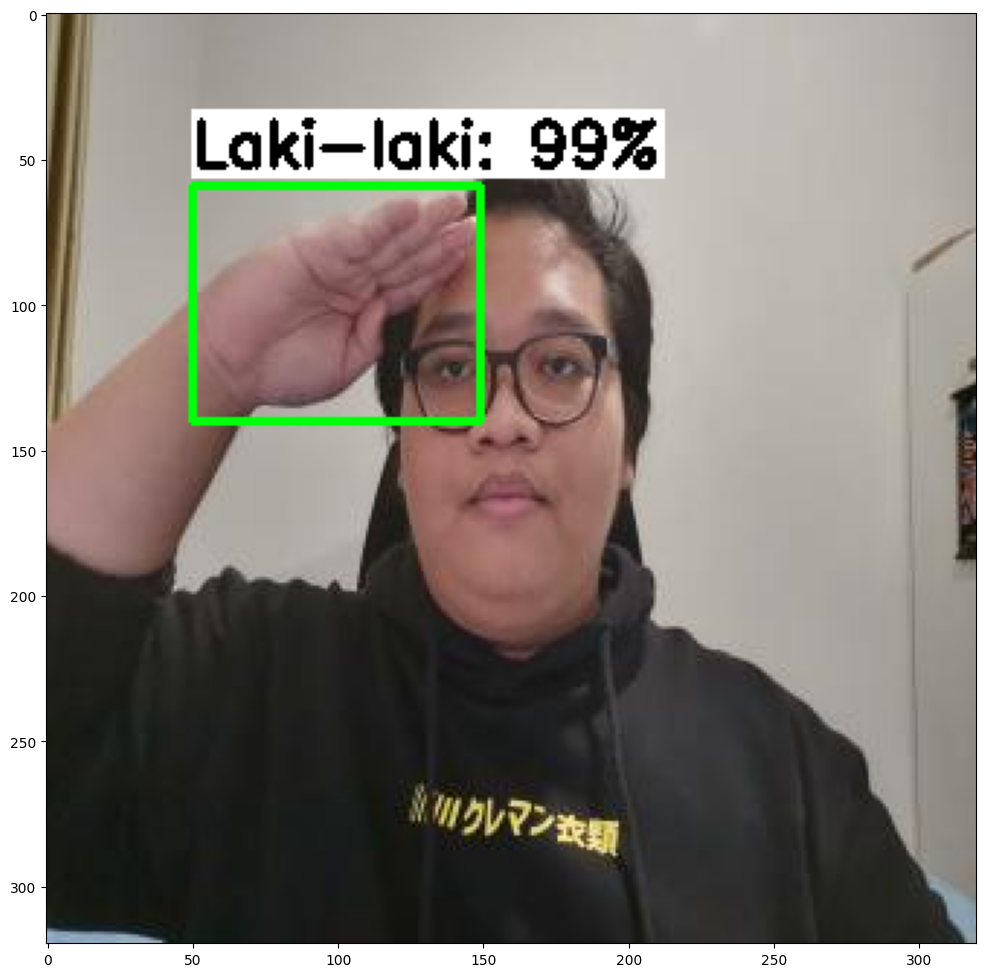

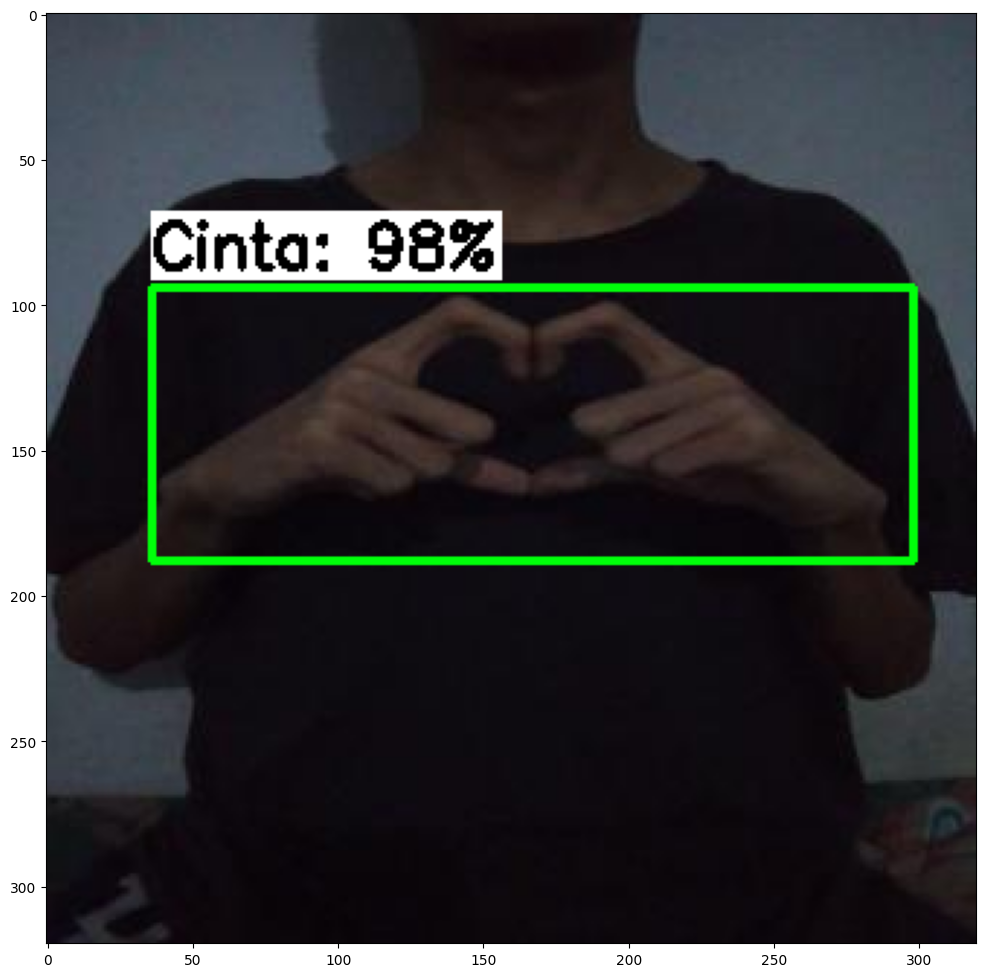

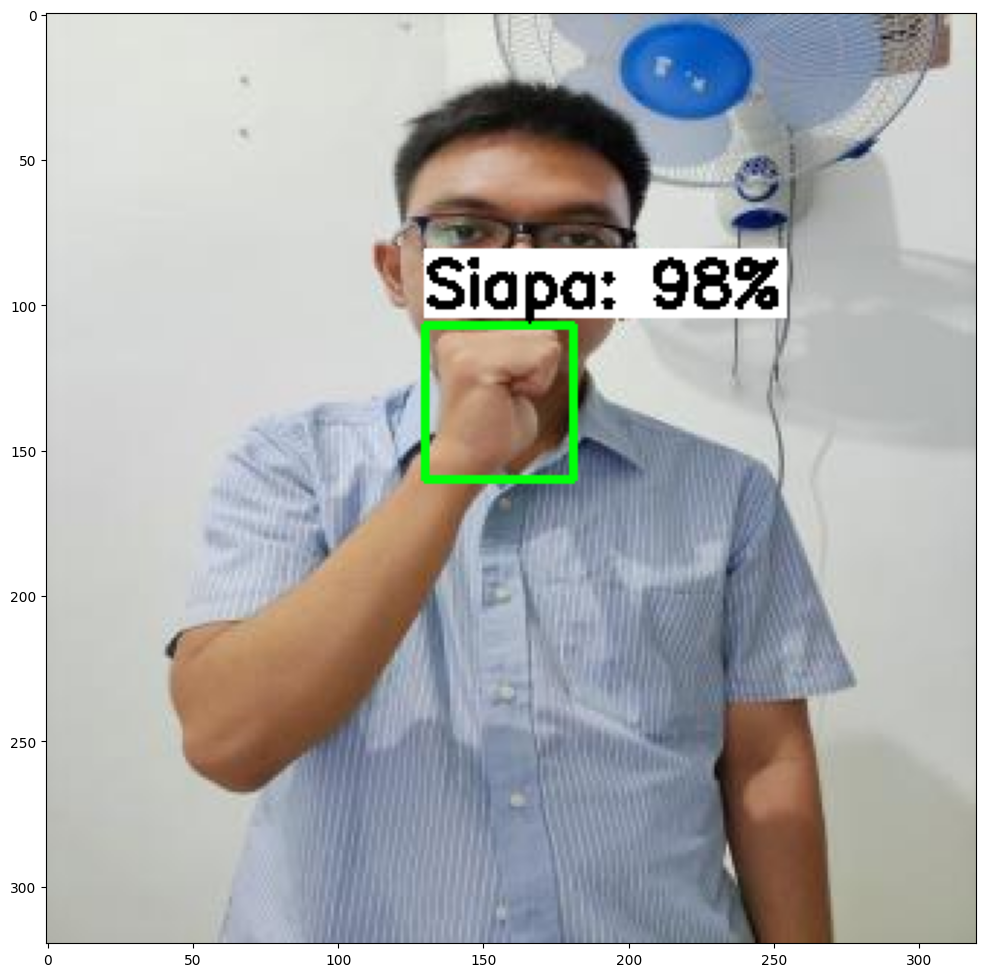

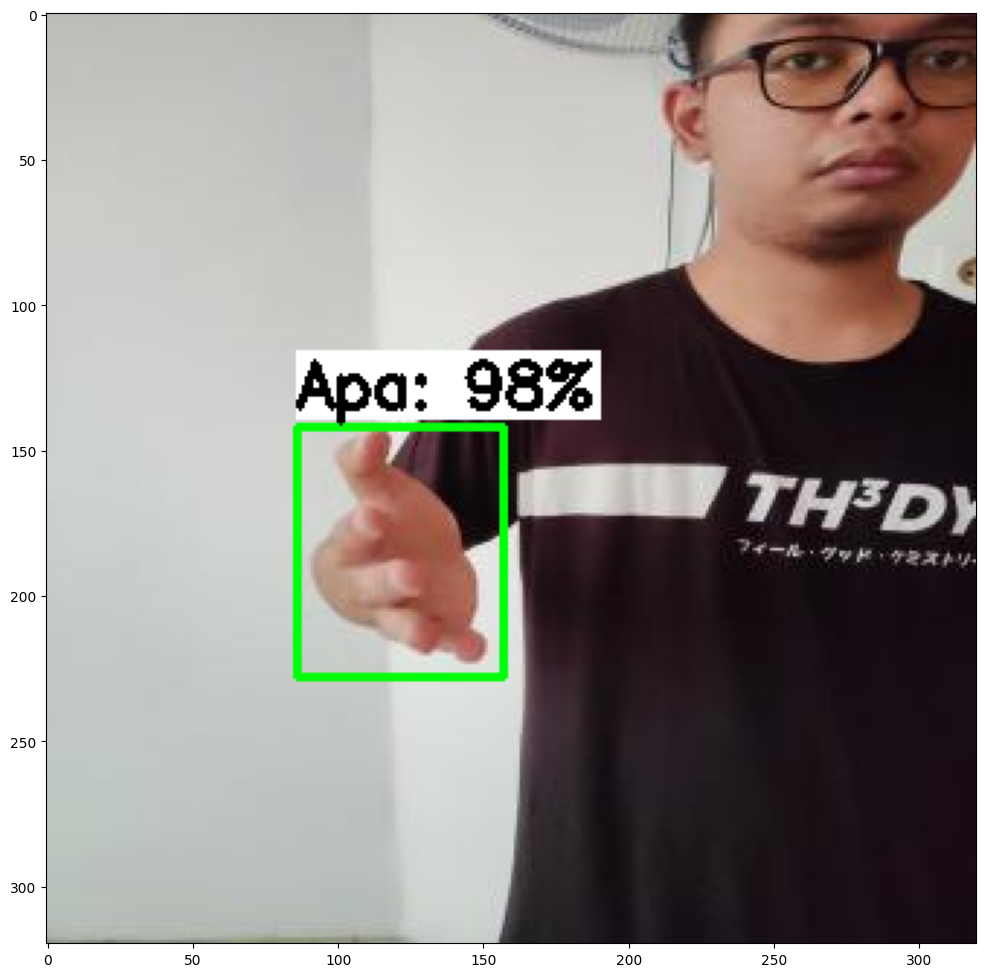

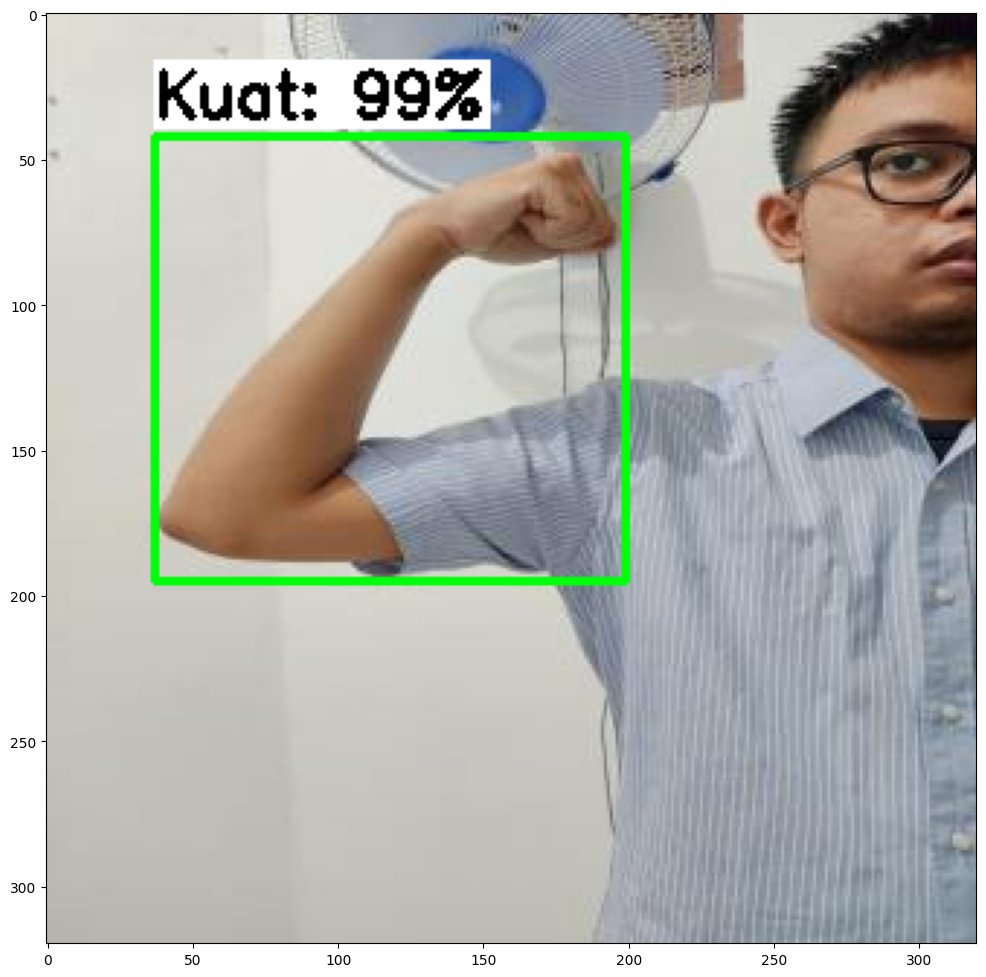

In [30]:
# Set up variables for running user's model
PATH_TO_IMAGES='images/test'   # Path to test images folder
PATH_TO_MODEL='model_metadata.tflite'   # Path to .tflite model file
PATH_TO_LABELS='classes.txt'   # Path to labelmap.txt file
min_conf_threshold=0.8   # Confidence threshold (try changing this to 0.01 if you don't see any detection results)
images_to_test=5 # Number of images to run detection on

# Run inferencing function!
tflite_detect_images(PATH_TO_MODEL, PATH_TO_IMAGES, PATH_TO_LABELS, min_conf_threshold, images_to_test)

## 7.2.&nbsp;Calculate mAP

In [31]:
!git clone https://github.com/Cartucho/mAP mAP
%cd mAP
!rm input/detection-results/* 
!rm input/ground-truth/* 
!rm input/images-optional/* 
!wget https://raw.githubusercontent.com/Patuli-Pahlawan-Tuli/Patuli-ML/main/utils/calculate_map_cartucho_modified.py
%cd ..

Cloning into 'mAP'...
remote: Enumerating objects: 908, done.
remote: Total 908 (delta 0), reused 0 (delta 0), pack-reused 908
Receiving objects: 100% (908/908), 14.71 MiB | 2.17 MiB/s, done.
Resolving deltas: 100% (321/321), done.
/home/dadang/Documents/ML/Bangkit/train_huruf/local_huruf/mAP
--2023-06-12 15:23:12--  https://raw.githubusercontent.com/Patuli-Pahlawan-Tuli/Patuli-ML/main/utils/calculate_map_cartucho_modified.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5268 (5.1K) [text/plain]
Saving to: ‘calculate_map_cartucho_modified.py’

calculate_map_cartu 100%[===================>]   5.14K  --.-KB/s    in 0.003s  

2023-06-12 15:23:13 (1.70 MB/s) - ‘calculate_map_cartucho_modified.py’ saved [5268/5268]

/home/dadang/Documents/ML/Bangkit/train_huruf

In [32]:
!cp images/test/* mAP/input/images-optional # Copy images and xml files
!mv mAP/input/images-optional/*.xml mAP/input/ground-truth/  # Move xml files to the appropriate folder

In [33]:
!python3 mAP/scripts/extra/convert_gt_xml.py

Conversion completed!


In [34]:
# Set up variables for running inference, this time to get detection results saved as .txt files
PATH_TO_IMAGES='images/test'   # Path to test images folder
PATH_TO_MODEL='model_metadata.tflite'   # Path to .tflite model file
PATH_TO_LABELS='classes.txt'   # Path to labelmap.txt file
PATH_TO_RESULTS='mAP/input/detection-results' # Folder to save detection results in
min_conf_threshold=0.8 # Confidence threshold

# Use all the images in the test folder
image_list = glob.glob(PATH_TO_IMAGES + '/*.jpg') + glob.glob(PATH_TO_IMAGES + '/*.JPG') + glob.glob(PATH_TO_IMAGES + '/*.png') + glob.glob(PATH_TO_IMAGES + '/*.bmp') + glob.glob(PATH_TO_IMAGES + '/*.jpeg')
images_to_test = min(500, len(image_list)) # If there are more than 500 images in the folder, just use 500

# Tell function to just save results and not display images
txt_only = True

# Run inferencing function!
print('Starting inference on %d images...' % images_to_test)
tflite_detect_images(PATH_TO_MODEL, PATH_TO_IMAGES, PATH_TO_LABELS, min_conf_threshold, images_to_test, PATH_TO_RESULTS, txt_only)
print('Finished inferencing!')

Starting inference on 276 images...
Finished inferencing!


In [35]:
!cp classes.txt mAP/

In [36]:
#if there a space in classes, ex: Terima Kasih
%cd mAP/
!wget https://raw.githubusercontent.com/Patuli-Pahlawan-Tuli/Patuli-ML/main/utils/remove_spaces_modified.py
%cd ..
!python3 mAP/remove_spaces_modified.py

/home/dadang/Documents/ML/Bangkit/train_huruf/local_huruf/mAP
--2023-06-12 15:25:05--  https://raw.githubusercontent.com/Patuli-Pahlawan-Tuli/Patuli-ML/main/utils/remove_spaces_modified.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1882 (1.8K) [text/plain]
Saving to: ‘remove_spaces_modified.py’

remove_spaces_modif 100%[===================>]   1.84K  --.-KB/s    in 0.001s  

2023-06-12 15:25:06 (1.57 MB/s) - ‘remove_spaces_modified.py’ saved [1882/1882]

/home/dadang/Documents/ML/Bangkit/train_huruf/local_huruf
Done!


In [37]:
%cd mAP/
!python3 scripts/extra/intersect-gt-and-dr.py
!python3 calculate_map_cartucho_modified.py --labels=classes.txt
%cd ..

/home/dadang/Documents/ML/Bangkit/train_huruf/local_huruf/mAP
total ground-truth files: 276
total detection-results files: 276

No backup required for /home/dadang/Documents/ML/Bangkit/train_huruf/local_huruf/mAP/input/ground-truth
No backup required for /home/dadang/Documents/ML/Bangkit/train_huruf/local_huruf/mAP/input/detection-results
total intersected files: 276
Intersection completed!
Calculating mAP at 0.50 IoU threshold...
100.00% = Apa AP 
100.00% = Atas AP 
100.00% = Bawah AP 
100.00% = Betul AP 
100.00% = Cinta AP 
33.33% = Hubungan AP 
100.00% = Ingin AP 
100.00% = Kamu AP 
100.00% = Kanan AP 
100.00% = Kiri AP 
100.00% = Kuat AP 
100.00% = Lagi AP 
100.00% = Laki-laki AP 
91.67% = Mana AP 
100.00% = Menulis AP 
100.00% = Perempuan AP 
100.00% = Sahabat AP 
100.00% = Salah AP 
100.00% = Sama-sama AP 
100.00% = Saya AP 
100.00% = Siapa AP 
100.00% = Terima-Kasih AP 
100.00% = Waktu AP 
mAP = 96.74%
Calculating mAP at 0.55 IoU threshold...
100.00% = Apa AP 
100.00% = Atas AP 

# 8.&nbsp;Post-Training Quantization

In [38]:
# Get list of all images in train directory
image_path = 'images/train'

jpg_file_list = glob.glob(image_path + '/*.jpg')
JPG_file_list = glob.glob(image_path + '/*.JPG')
png_file_list = glob.glob(image_path + '/*.png')
bmp_file_list = glob.glob(image_path + '/*.bmp')
jpeg_file_list = glob.glob(image_path + '/*.jpeg')

quant_image_list = jpg_file_list + JPG_file_list + png_file_list + bmp_file_list + jpeg_file_list

In [39]:
# A generator that provides a representative dataset
# Code modified from https://colab.research.google.com/github/google-coral/tutorials/blob/master/retrain_classification_ptq_tf2.ipynb

# First, get input details for model so we know how to preprocess images
interpreter = Interpreter(model_path=PATH_TO_MODEL)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
height = input_details[0]['shape'][1]
width = input_details[0]['shape'][2]

import random

def representative_data_gen():
  dataset_list = quant_image_list
  quant_num = 300
  for i in range(quant_num):
    pick_me = random.choice(dataset_list)
    image = tf.io.read_file(pick_me)

    if pick_me.endswith('.jpg') or pick_me.endswith('.JPG') or pick_me.endswith('.jpeg'):
      image = tf.io.decode_jpeg(image, channels=3)
    elif pick_me.endswith('.png'):
      image = tf.io.decode_png(image, channels=3)
    elif pick_me.endswith('.bmp'):
      image = tf.io.decode_bmp(image, channels=3)

    image = tf.image.resize(image, [width, height])
    image = tf.cast(image / 255., tf.float32)
    image = tf.expand_dims(image, 0)
    yield [image]

In [40]:
# Initialize converter module
converter = tf.lite.TFLiteConverter.from_saved_model('custom_model_lite/saved_model')

# This enables quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# This sets the representative dataset for quantization
converter.representative_dataset = representative_data_gen
# This ensures that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# For full integer quantization, though supported types defaults to int8 only, we explicitly declare it for clarity.
converter.target_spec.supported_types = [tf.int8]
# These set the input tensors to uint8 and output tensors to float32
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.float32
tflite_model = converter.convert()

with open('custom_model_lite/detect_quant.tflite', 'wb') as f:
  f.write(tflite_model)

2023-06-12 15:26:04.758291: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2023-06-12 15:26:04.758347: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2023-06-12 15:26:04.758511: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: custom_model_lite/saved_model
2023-06-12 15:26:04.789271: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2023-06-12 15:26:04.789309: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if present) from: custom_model_lite/saved_model
2023-06-12 15:26:04.893866: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2023-06-12 15:26:05.419908: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: custom_model_lite/saved_model
2023-06-12 15:26:05.707527: I tensorflow/cc/saved_model/loader.cc:301] SavedModel load for tags { ser

Estimated count of arithmetic ops: 1.788 G  ops, equivalently 0.894 G  MACs
Estimated count of arithmetic ops: 1.788 G  ops, equivalently 0.894 G  MACs


fully_quantize: 0, inference_type: 6, input_inference_type: 3, output_inference_type: 0
2023-06-12 15:26:50.728956: I tensorflow/compiler/mlir/lite/flatbuffer_export.cc:1963] Estimated count of arithmetic ops: 1.788 G  ops, equivalently 0.894 G  MACs



## 8.1&nbsp;Write Metadata to TensorFlow Lite

In [41]:
from tflite_support.metadata_writers import object_detector
from tflite_support.metadata_writers import metadata_info
from tflite_support.metadata_writers import writer_utils
from tflite_support import metadata_schema_py_generated as _metadata_fb

In [42]:
ObjectDetectorWriter = object_detector.MetadataWriter
_MODEL_PATH = "custom_model_lite/detect_quant.tflite"
# Task Library expects label files that are in the same format as the one below.
_LABEL_FILE = "classes.txt"
_SAVE_TO_PATH = "model_metadata_quant.tflite"
# Normalization parameters is required when reprocessing the image. It is
# optional if the image pixel values are in range of [0, 255] and the input
# tensor is quantized to uint8. See the introduction for normalization and
# quantization parameters below for more details.
# https://www.tensorflow.org/lite/models/convert/metadata#normalization_and_quantization_parameters)
_INPUT_NORM_MEAN = 127.5
_INPUT_NORM_STD = 127.5

# Create the metadata writer.
writer = ObjectDetectorWriter.create_for_inference(
    writer_utils.load_file(_MODEL_PATH), [_INPUT_NORM_MEAN], [_INPUT_NORM_STD],
    [_LABEL_FILE])

# Verify the metadata generated by metadata writer.
print(writer.get_metadata_json())

# Populate the metadata into the model.
writer_utils.save_file(writer.populate(), _SAVE_TO_PATH)

{
  "name": "ObjectDetector",
  "description": "Identify which of a known set of objects might be present and provide information about their positions within the given image or a video stream.",
  "subgraph_metadata": [
    {
      "input_tensor_metadata": [
        {
          "name": "image",
          "description": "Input image to be detected.",
          "content": {
            "content_properties_type": "ImageProperties",
            "content_properties": {
              "color_space": "RGB"
            }
          },
          "process_units": [
            {
              "options_type": "NormalizationOptions",
              "options": {
                "mean": [
                  127.5
                ],
                "std": [
                  127.5
                ]
              }
            }
          ],
          "stats": {
            "max": [
              255.0
            ],
            "min": [
              0.0
            ]
          }
        }
      ],
    

In [43]:
from tflite_support import metadata

displayer = metadata.MetadataDisplayer.with_model_file("model_metadata.tflite")
print("Metadata populated:")
print(displayer.get_metadata_json())

print("Associated file(s) populated:")
for file_name in displayer.get_packed_associated_file_list():
  print("file name: ", file_name)
  print("file content:")
  print(displayer.get_associated_file_buffer(file_name))

Metadata populated:
{
  "name": "ObjectDetector",
  "description": "Identify which of a known set of objects might be present and provide information about their positions within the given image or a video stream.",
  "subgraph_metadata": [
    {
      "input_tensor_metadata": [
        {
          "name": "image",
          "description": "Input image to be detected.",
          "content": {
            "content_properties_type": "ImageProperties",
            "content_properties": {
              "color_space": "RGB"
            }
          },
          "process_units": [
            {
              "options_type": "NormalizationOptions",
              "options": {
                "mean": [
                  127.5
                ],
                "std": [
                  127.5
                ]
              }
            }
          ],
          "stats": {
            "max": [
              1.0
            ],
            "min": [
              -1.0
            ]
          }
    

## 8.2&nbsp; Calculate mAP

In [44]:
%cd mAP
!rm -rf input/detection-results/* 
!rm -rf input/ground-truth/* 
!rm -rf input/images-optional/* 
%cd ..

/home/dadang/Documents/ML/Bangkit/train_huruf/local_huruf/mAP
/home/dadang/Documents/ML/Bangkit/train_huruf/local_huruf


In [45]:
!cp images/test/* mAP/input/images-optional # Copy images and xml files
!mv mAP/input/images-optional/*.xml mAP/input/ground-truth/  # Move xml files to the appropriate folder

In [46]:
!python3 mAP/scripts/extra/convert_gt_xml.py

Conversion completed!


In [47]:
# Set up variables for running inference, this time to get detection results saved as .txt files
PATH_TO_IMAGES='images/test'   # Path to test images folder
PATH_TO_MODEL='model_metadata_quant.tflite'   # Path to .tflite model file
PATH_TO_LABELS='classes.txt'   # Path to labelmap.txt file
PATH_TO_RESULTS='mAP/input/detection-results' # Folder to save detection results in
min_conf_threshold=0.8 # Confidence threshold

# Use all the images in the test folder
image_list = glob.glob(PATH_TO_IMAGES + '/*.jpg') + glob.glob(PATH_TO_IMAGES + '/*.JPG') + glob.glob(PATH_TO_IMAGES + '/*.png') + glob.glob(PATH_TO_IMAGES + '/*.bmp') + glob.glob(PATH_TO_IMAGES + '/*.jpeg')
images_to_test = min(500, len(image_list)) # If there are more than 500 images in the folder, just use 500

# Tell function to just save results and not display images
txt_only = True

# Run inferencing function!
print('Starting inference on %d images...' % images_to_test)
tflite_detect_images(PATH_TO_MODEL, PATH_TO_IMAGES, PATH_TO_LABELS, min_conf_threshold, images_to_test, PATH_TO_RESULTS, txt_only)
print('Finished inferencing!')

Starting inference on 276 images...


In [ ]:
!cp classes.txt mAP/

In [ ]:
#if there a space in classes, ex: Terima Kasih
%cd mAP/
!wget https://raw.githubusercontent.com/Patuli-Pahlawan-Tuli/Patuli-ML/main/utils/remove_spaces_modified.py
%cd ..
!python3 mAP/remove_spaces_modified.py

In [ ]:
!rm -rf mAP/outputs
%cd mAP/
!python3 scripts/extra/intersect-gt-and-dr.py
!python3 calculate_map_cartucho_modified.py --labels=classes.txt
%cd ..